# Bolt Size Identification

**Source:** Mechanics of Material (by Hibbler) textbook, chapter 7

In [1]:
import pandas as pd 
import os
import math

# Directory of where the data files are stored. Replace all instances of \ with \\
work_directory = r'E:\\OneDrive - Joseph\\OneDrive\\Documents\\Python Scripts\\Bolt Sizing Calculations'

# Change working directory to where the data are stored
os.chdir(work_directory)

materials_data = pd.read_excel("Materials Data.xlsx")
materials_data.head()

,Type,Material,Yield Tenisile Strength,Ultimate Tensile Strength,Yield Shear Strength,Factor of Safety,Allowable Shear Stress,Allowable Tensile Stress
0,A4-70,SS316,450,700,225.0,1.5,150.000000,300.000000
1,A2-80,SS304,400,800,220.0,1.5,146.666667,266.666667
2,A4-50,SS316,210,500,115.5,1.5,77.000000,140.000000


In [2]:
direct_shear_load_x = float(input("X-direction shear load: "))
direct_shear_load_y = float(input("Y-direction shear load: "))
print(f"The shear load is {direct_shear_load_x} (x-dir) and {direct_shear_load_y} (y-dir).\n")

# secondary_tension_load is equal to resultant_tensile_load
resultant_tensile_load = float(input("Secondary Tension Load due to Moment: "))
print(f"The resultant tensile load is {resultant_tensile_load}.\n")

my_type = input("What type of material to use: ")
my_type = my_type.strip()
my_type = my_type.upper()
print(f"The type you have chosen is {my_type}.\n")

X-direction shear load: 2931.4
Y-direction shear load: 2779.6
The shear load is 2931.4 (x-dir) and 2779.6 (y-dir).

Secondary Tension Load due to Moment: 16809
The resultant tensile load is 16809.0.

What type of material to use: a4-70 
The type you have chosen is A4-70.



### Equivalent Tensile Force
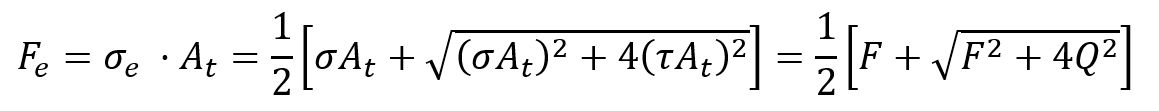

### Equivalent Shear Force
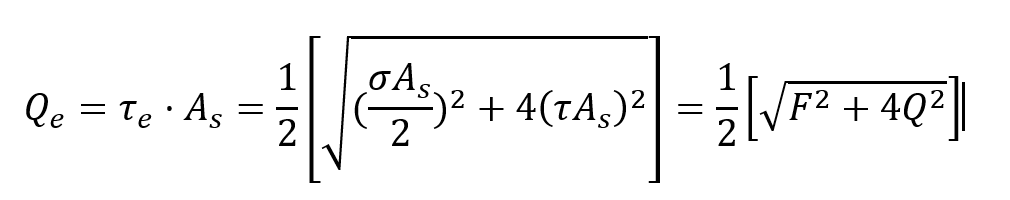

In [3]:
# Pythagoras theorem
resultant_shear_load = ((direct_shear_load_x**2)+(direct_shear_load_y**2))**0.5
print(f"The resultant shear load is {resultant_shear_load}.\n")

# Q_e is Equivalent Shear Load
Q_e = 0.5 * ((resultant_tensile_load**2)+4*(resultant_shear_load**2))**0.5
print(f"The Equivalent Shear Load is {Q_e}.")

# F_e is the Equivalent Tensile Load
F_e = 0.5 * (resultant_tensile_load + ((resultant_tensile_load**2)+4*(resultant_shear_load**2))**0.5 )
print(f"The Equivalent Tensile Load is {F_e}.\n")

The resultant shear load is 4039.713123477953.

The Equivalent Shear Load is 9324.96125300261.
The Equivalent Tensile Load is 17729.46125300261.



### Preliminary Bolt Sizing

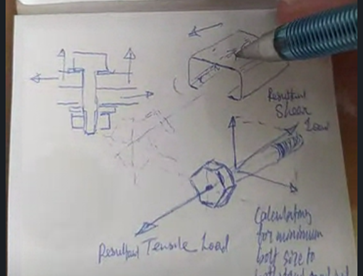

In [4]:
allowable_shear_stress = float(materials_data.loc[materials_data['Type'] == my_type, ["Allowable Shear Stress"]].values[0])
print(f"The allowable shear stress is {allowable_shear_stress}.")

# A_s is the Minimum Required Area for Shear stress
A_s = Q_e / allowable_shear_stress
print(f"The Minimum Required Area for Shear stress is {A_s}.\n")


allowable_tensile_stress = float(materials_data.loc[materials_data['Type'] == my_type, ["Allowable Tensile Stress"]].values[0])
print(f"The allowable tensile stress is {allowable_tensile_stress}.")

# A_t is the Minimum Required Area for Tensile stress
A_t = F_e / allowable_tensile_stress
print(f"The Minimum Required Area for Tensile stress is {A_t}.\n")

# D_min is Minimum required Bolt Diameter overall
if A_s > A_t:
    D_min = float(2*(A_s/math.pi)**0.5)
elif A_t > A_s:
    D_min = float(2*(A_t/math.pi)**0.5)

# round up the bolt size to nearest even number
if round(D_min)//2 == 0:
    D_min
else:
    D_min_round = round(D_min)+1
    
print(f"The Minimum Bolt Diameter is {D_min:.2f} with rounded value of {D_min_round}.\n Remember to round up!")

The allowable shear stress is 150.0.
The Minimum Required Area for Shear stress is 62.16640835335073.

The allowable tensile stress is 300.0.
The Minimum Required Area for Tensile stress is 59.09820417667537.

The Minimum Bolt Diameter is 8.90 with rounded value of 10.
 Remember to round up!
